In [2]:
import torch
import numpy as np
import torch.nn as nn

# Basics

In [3]:
torch.empty(2, 2).size()

torch.Size([2, 2])

In [4]:
torch.rand(1,1)

tensor([[0.0476]])

In [5]:
b = torch.tensor([1, 2])
b.add_(1)
b

tensor([2, 3])

In [6]:
# reshape
a = torch.empty(4, 3).fill_(5)
print(f'{a=}')
b = a.view(4*3)
print(f'{b=}')

a=tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])
b=tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


In [7]:
a_numpy_link = a.numpy()
a_numpy_link[:, 0] = 1
a

tensor([[1., 5., 5.],
        [1., 5., 5.],
        [1., 5., 5.],
        [1., 5., 5.]])

In [8]:
np_arr = np.array([1, 2, 3], dtype=np.int32)
arr_link = torch.from_numpy(np_arr)
arr_link[0] = 0
np_arr

array([0, 2, 3])

# Autograd

In [9]:
x = torch.tensor([1, 2, 3, 4, 5], dtype=float, requires_grad=True)
print(x + 1)
y = x.mean()
print(y)
y.backward()
print(x.grad)

tensor([2., 3., 4., 5., 6.], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(3., dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000], dtype=torch.float64)


In [10]:
w = torch.ones(4, requires_grad=True)

for epoch in range(5):
    y = 3*w.sum()
    y.backward()

    print(f'epoch №{epoch}: {w.grad}')

epoch №0: tensor([3., 3., 3., 3.])
epoch №1: tensor([6., 6., 6., 6.])
epoch №2: tensor([9., 9., 9., 9.])
epoch №3: tensor([12., 12., 12., 12.])
epoch №4: tensor([15., 15., 15., 15.])


In [11]:
w = torch.ones(4, requires_grad=True)

for epoch in range(5):
    y = 3*w.sum()
    y.backward()

    print(f'epoch №{epoch}: {w.grad}')

    # correct
    w.grad.zero_()

epoch №0: tensor([3., 3., 3., 3.])
epoch №1: tensor([3., 3., 3., 3.])
epoch №2: tensor([3., 3., 3., 3.])
epoch №3: tensor([3., 3., 3., 3.])
epoch №4: tensor([3., 3., 3., 3.])


# Backpropagation

In [12]:
x = torch.tensor(1.)
y = torch.tensor(2.)

w = torch.tensor(1., requires_grad=True)

def forward(x):
    return w * x

def mse(y, y_pred):
    return torch.mean((y - y_pred)**2)

learning_rate = 0.4
for epoch in range(5):
    print(f'\nEPOCH №{epoch+1}')

    # forward pass: compute the loss
    y_hat = forward(x)
    loss = mse(y, y_hat)

    # backward pass: compute the gradients
    loss.backward()

    print(f'{loss=:.4f}, {w.grad=:.4f}, {w=:.4f}')

    with torch.no_grad():
        # update weights
        w -= learning_rate * w.grad
        w.grad.zero_()


EPOCH №1
loss=1.0000, w.grad=-2.0000, w=1.0000

EPOCH №2
loss=0.0400, w.grad=-0.4000, w=1.8000

EPOCH №3
loss=0.0016, w.grad=-0.0800, w=1.9600

EPOCH №4
loss=0.0001, w.grad=-0.0160, w=1.9920

EPOCH №5
loss=0.0000, w.grad=-0.0032, w=1.9984


# Training pipeline

In [13]:
X = torch.tensor([[1.]])
Y = torch.tensor([[2.]])

n_samples, n_features = X.shape

class LinearRegression(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.linear(x)
    
model = LinearRegression(n_samples, n_samples)
mse = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 0.2)

for epoch in range(5):
    print(f'\nEPOCH №{epoch+1}')

    y_hat = model(X)
    loss = mse(Y, y_hat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    w, b = model.parameters()
    print(f'{loss=:.4f}, {w[0][0]=:.4f}, {b[0]=:.4f}')


EPOCH №1
loss=2.9454, w[0][0]=1.2539, b[0]=0.4029

EPOCH №2
loss=0.1178, w[0][0]=1.3912, b[0]=0.5402

EPOCH №3
loss=0.0047, w[0][0]=1.4186, b[0]=0.5677

EPOCH №4
loss=0.0002, w[0][0]=1.4241, b[0]=0.5731

EPOCH №5
loss=0.0000, w[0][0]=1.4252, b[0]=0.5742


# Linear regression

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [71]:
n_samples, n_features = 100, 1

X, y = datasets.make_regression(n_samples, n_features, noise=10, random_state=1)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32)).view(-1, n_features)

In [115]:
input_size, output_size = n_features, 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.5
crit = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [116]:
num_epochs = 7
for epoch in range(num_epochs):
    y_pred = model(X)
    loss = crit(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    w, b = model.parameters()
    print(f'{loss=:.4f}, {w[0][0]=:.4f}, {b[0]=:.4f}')

loss=5349.1973, w[0][0]=64.3631, b[0]=6.9700
loss=331.0624, w[0][0]=77.6301, b[0]=3.0711
loss=96.1206, w[0][0]=80.6899, b[0]=2.2674
loss=83.8217, w[0][0]=81.3898, b[0]=2.0820
loss=83.1775, w[0][0]=81.5500, b[0]=2.0396
loss=83.1438, w[0][0]=81.5866, b[0]=2.0299
loss=83.1420, w[0][0]=81.5950, b[0]=2.0277


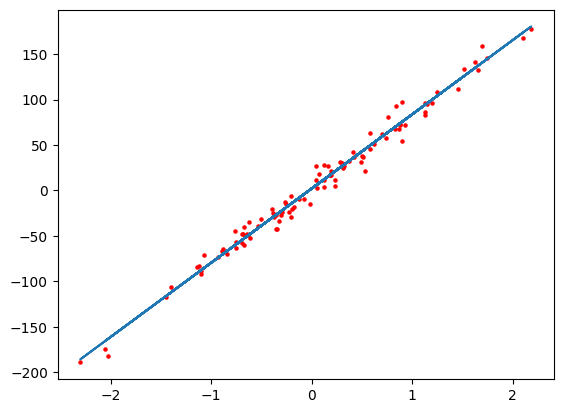

In [117]:
y_pred = [[]]
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X, y, s=5, c='r')
plt.plot(X, y_pred);

# Logistic regression

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [223]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X.shape

(569, 30)

In [224]:
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid_(self.linear(x))
        return y_pred
    
model = LogisticRegression(n_features)

learning_rate = 0.9
crit = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [225]:
num_epochs = 10
for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = crit(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    w, b = model.parameters()
    print(f'{loss=:.4f}, {w[0][0]=:.4f}, {b[0]=:.4f}')

loss=0.7527, w[0][0]=-0.3379, b[0]=0.0023
loss=0.2026, w[0][0]=-0.3686, b[0]=0.0464
loss=0.1618, w[0][0]=-0.3892, b[0]=0.0845
loss=0.1414, w[0][0]=-0.4035, b[0]=0.1178
loss=0.1307, w[0][0]=-0.4142, b[0]=0.1471
loss=0.1238, w[0][0]=-0.4229, b[0]=0.1733
loss=0.1186, w[0][0]=-0.4302, b[0]=0.1970
loss=0.1142, w[0][0]=-0.4367, b[0]=0.2186
loss=0.1106, w[0][0]=-0.4426, b[0]=0.2383
loss=0.1074, w[0][0]=-0.4479, b[0]=0.2565


In [226]:
X_train.shape, y_train.shape

(torch.Size([455, 30]), torch.Size([455, 1]))

In [245]:
with torch.no_grad():
    y_pred = model(X_train).round_()
    y_pred_test = model(X_test).round_()

print(f'acc_train = {torch.sum(y_pred) / y_pred.shape[0]:.2%}')
print(f'acc_test = {torch.sum(y_pred_test) / y_pred_test.shape[0]:.2%}')

acc_train = 62.86%
acc_test = 62.28%
